In [1]:
import sys
!{sys.executable} -m pip install shapwaterfall==0.1.4

  Attempting uninstall: shapwaterfall
    Found existing installation: shapwaterfall 0.1.3
    Uninstalling shapwaterfall-0.1.3:
      Successfully uninstalled shapwaterfall-0.1.3


In [2]:
# Scikit-Learn WI Breast Cancer Data Example
# packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import waterfall_chart
from shapwaterfall import shapwaterfall

# models
rf_clf = RandomForestClassifier(n_estimators=1666, max_features="auto", min_samples_split=2, min_samples_leaf=2,
                            max_depth=20, bootstrap=True, n_jobs=1)


In [3]:
# models
rf_clf = RandomForestClassifier(n_estimators=1666, max_features="auto", min_samples_split=2, min_samples_leaf=2,
                            max_depth=20, bootstrap=True, n_jobs=1)

# load and organize Wisconsin Breast Cancer Data
data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

# data splits
X_tng, X_val, y_tng, y_val = train_test_split(features, labels, test_size=0.33, random_state=42)

print(X_tng.shape) # (381, 30)
print(X_val.shape) # (188, 30)

X_tng = pd.DataFrame(X_tng)
X_tng.columns = feature_names
X_val = pd.DataFrame(X_val)
X_val.columns = feature_names

# fit classifiers and measure AUC
clf = rf_clf.fit(X_tng, y_tng)
pred_rf = clf.predict_proba(X_val)
score_rf = roc_auc_score(y_val,pred_rf[:,1])
print(score_rf, 'Random Forest AUC')

(381, 30)
(188, 30)
0.9950659923522881 Random Forest AUC


In [4]:
# IMPORTANT: add a 'Reference' column to the val/test/score data
X_val = pd.DataFrame(X_val)
X_val['Reference'] = X_val.index
print(X_val.shape) # (188, 31)

(188, 31)


In [5]:
X_val

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Reference
0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,0
1,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,1
2,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,2
3,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,3
4,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,25.27,129.00,1233.0,0.1314,0.2236,0.2802,0.12160,0.2792,0.08158,183
184,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.88,146.40,1600.0,0.1412,0.3089,0.3533,0.16630,0.2510,0.09445,184
185,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,185
186,14.47,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,...,31.73,113.50,808.9,0.1340,0.4202,0.4040,0.12050,0.3187,0.10230,186


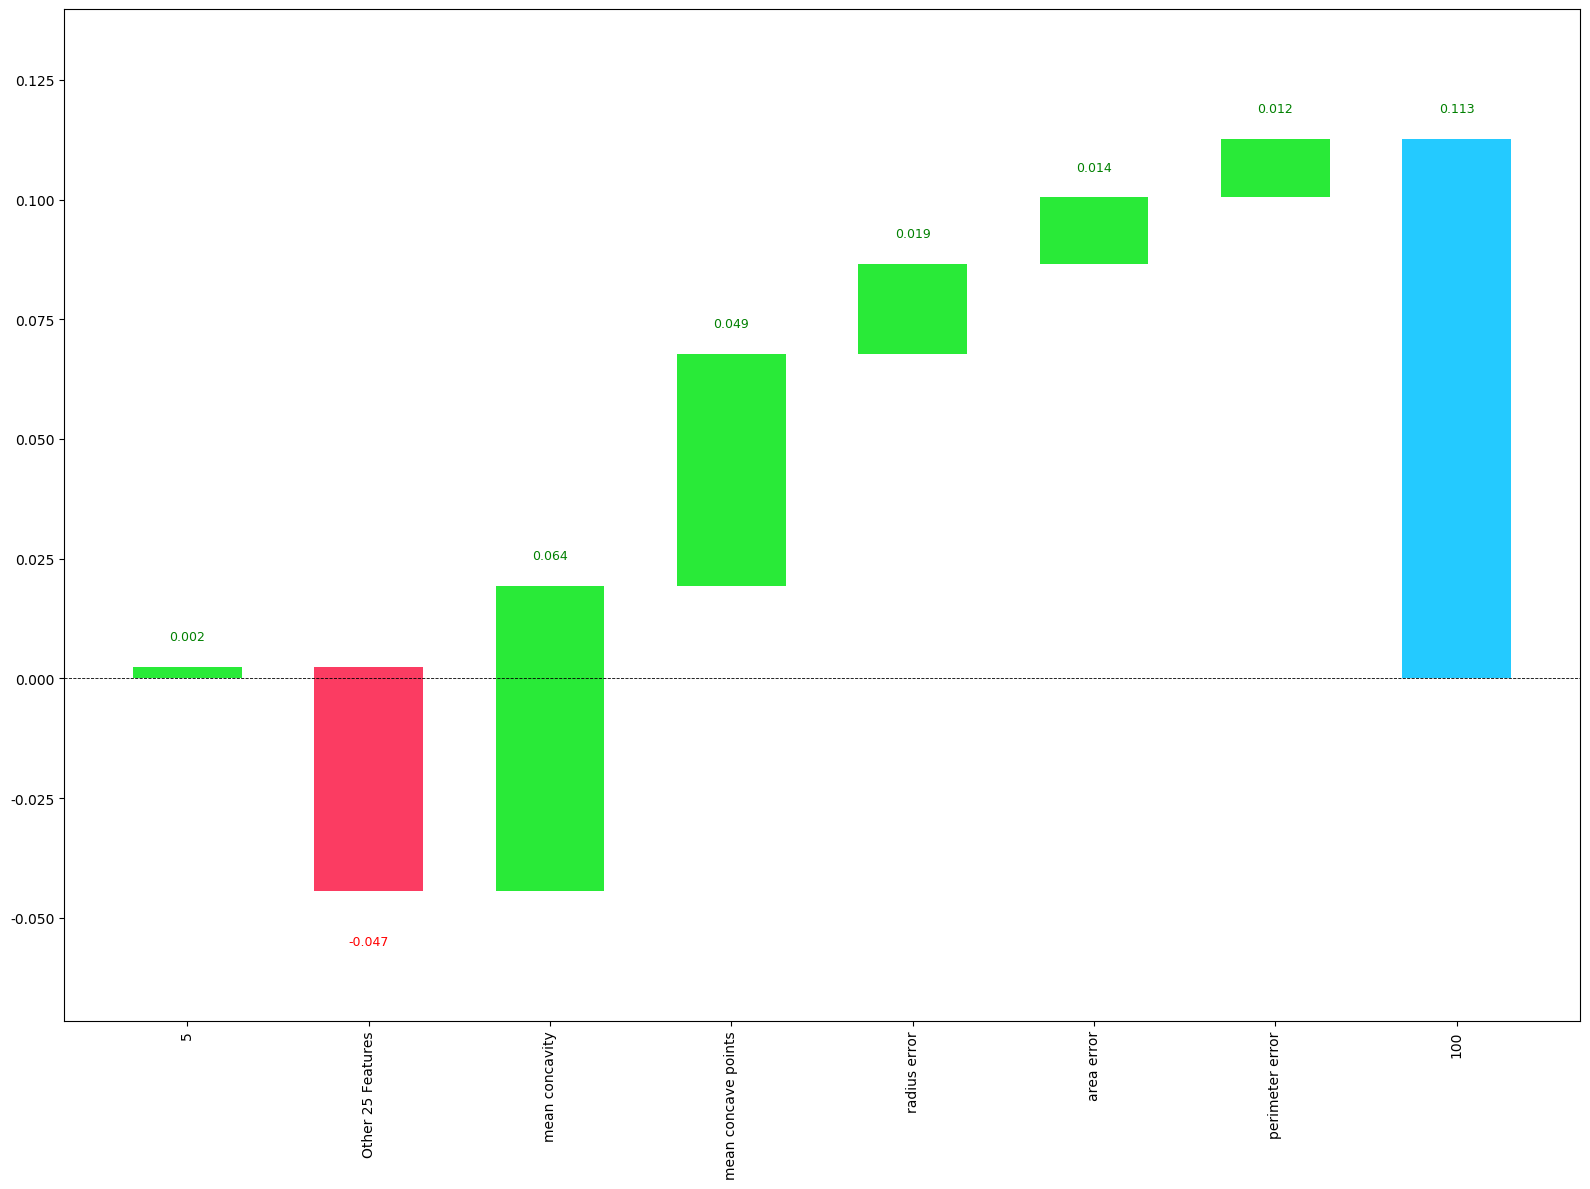

In [6]:
# Use Case 1
shapwaterfall(clf, X_tng, X_val, 5, 100, 5)

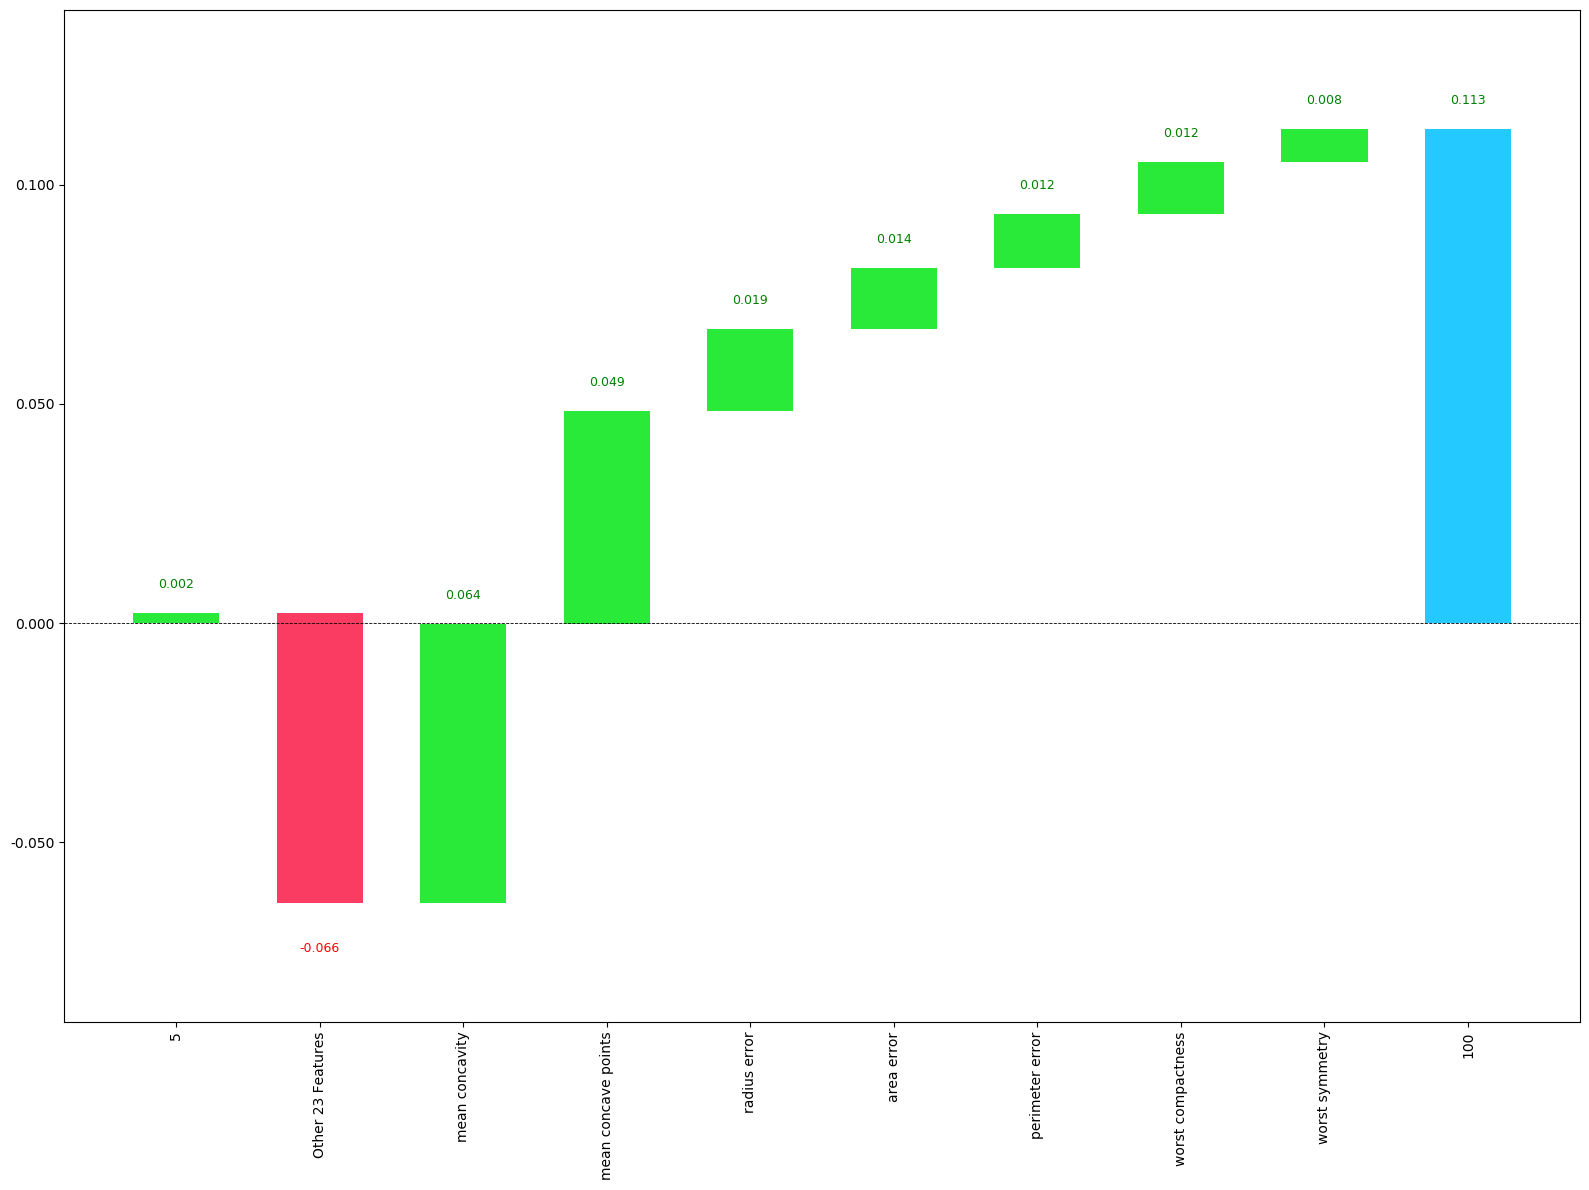

In [7]:
shapwaterfall(clf, X_tng, X_val, 100, 5, 7)

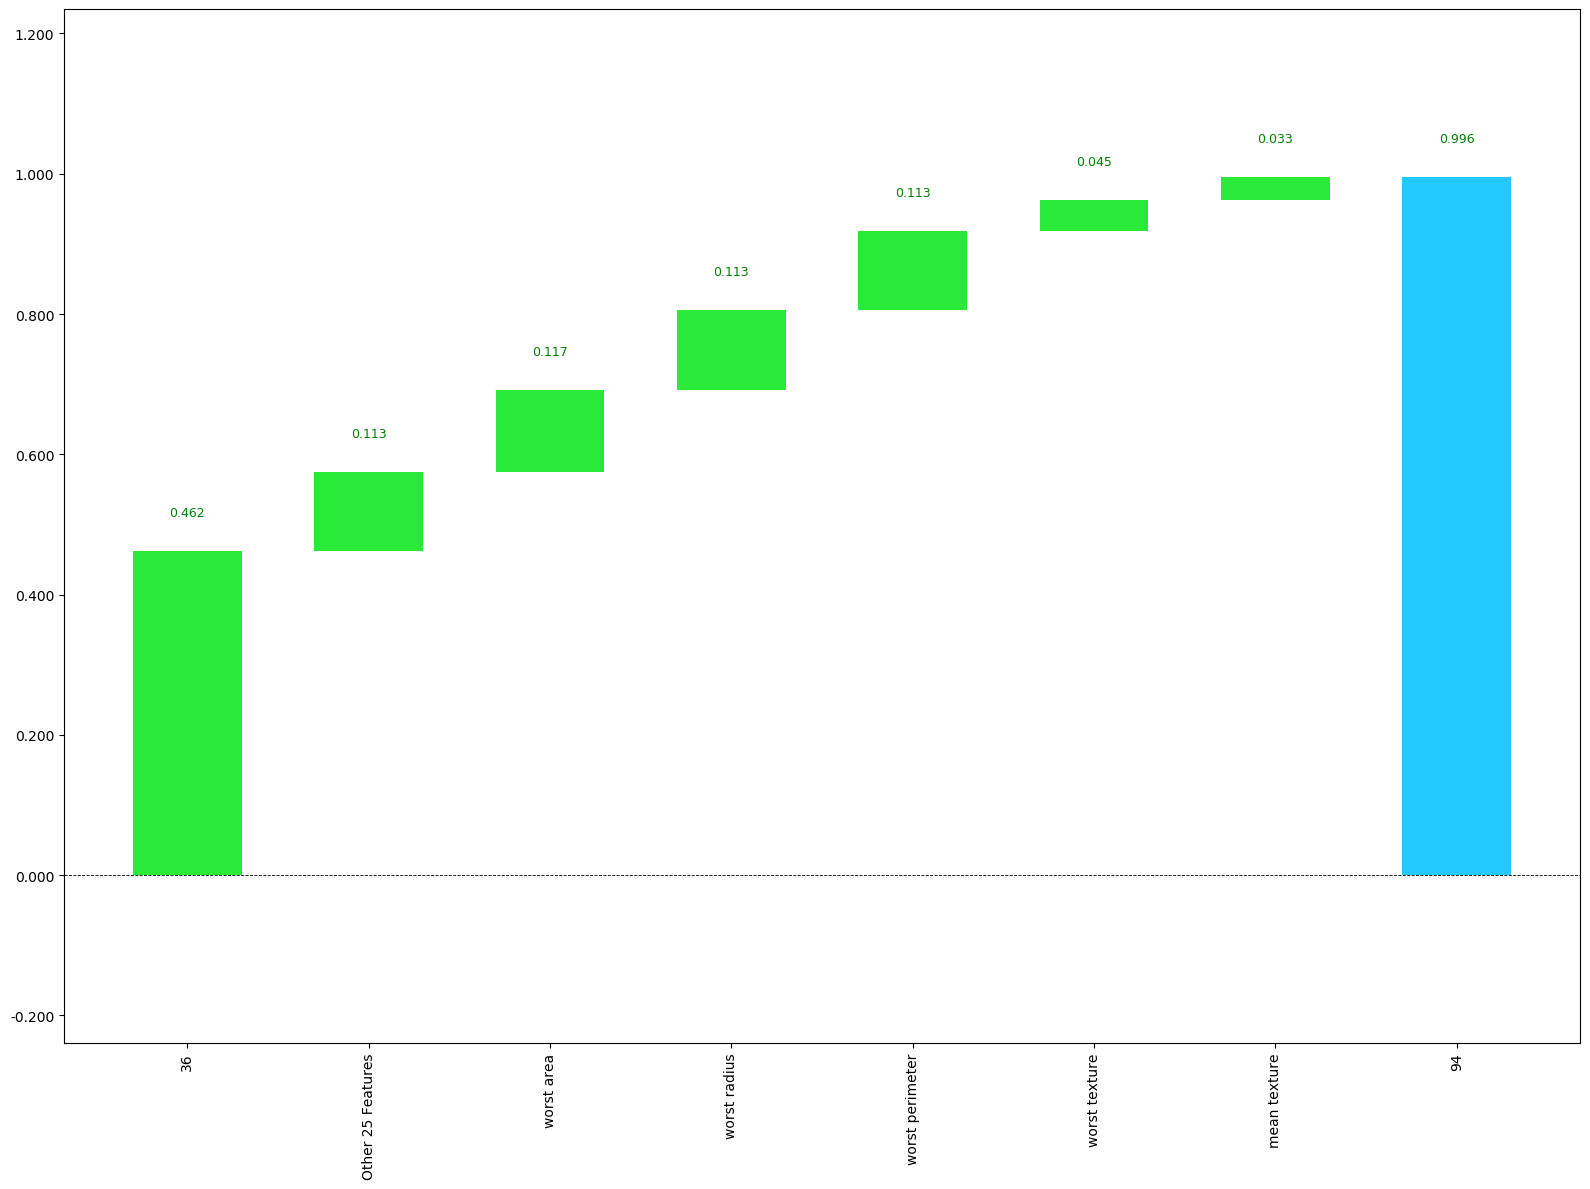

In [8]:
# Use Case 2
shapwaterfall(clf, X_tng, X_val, 36, 94, 5)

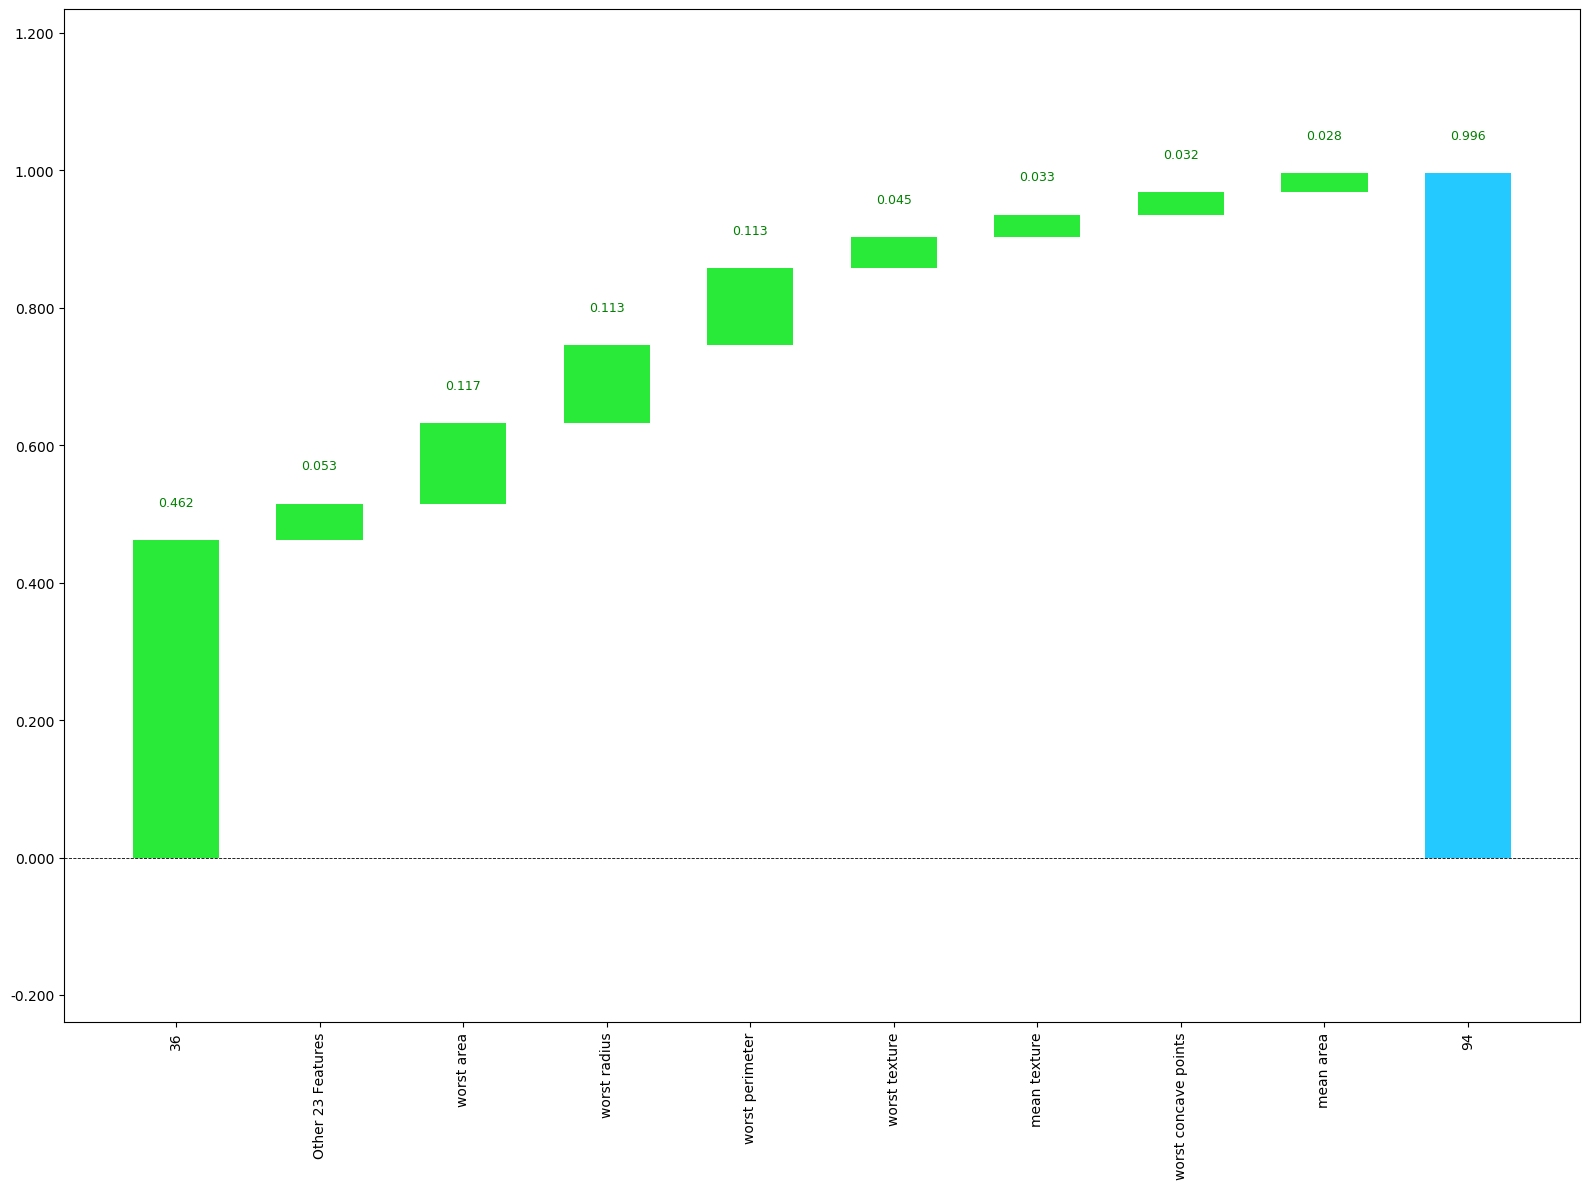

In [9]:
shapwaterfall(clf, X_tng, X_val, 94, 36, 7)